In [ ]:
! pip install -q kaggle

In [ ]:
from google.colab import files

In [ ]:
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"jaymehta2001","key":"861b402b31825cc9bd86cdb12a420297"}'}

In [ ]:
!mkdir ~/.CVProject

In [ ]:
!cp kaggle.json ~/.CVProject/

In [ ]:
! chmod 600 ~/.CVProject/kaggle.json

In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR']='/content/.CVProjects'

In [ ]:
os.environ['KAGGLE_CONFIG_DIR']='/root/.CVProject'

In [ ]:
! kaggle datasets download -d jangedoo/utkface-new

 97% 321M/331M [00:02<00:00, 223MB/s]
100% 331M/331M [00:02<00:00, 170MB/s]


In [ ]:
!unzip \*.zip && rm*.zip

Streaming output truncated to the last 5000 lines.
  inflating: utkface_aligned_cropped/crop_part1/34_1_0_20170111182452832.jpg.chip.jpg  
  inflating: utkface_aligned_cropped/crop_part1/34_1_1_20170103230340961.jpg.chip.jpg  
  inflating: utkface_aligned_cropped/crop_part1/34_1_1_20170104011329697.jpg.chip.jpg  
  inflating: utkface_aligned_cropped/crop_part1/34_1_1_20170104165020320.jpg.chip.jpg  
  inflating: utkface_aligned_cropped/crop_part1/34_1_1_20170108230211421.jpg.chip.jpg  
  inflating: utkface_aligned_cropped/crop_part1/34_1_2_20170104022134829.jpg.chip.jpg  
  inflating: utkface_aligned_cropped/crop_part1/34_1_2_20170104023010725.jpg.chip.jpg  
  inflating: utkface_aligned_cropped/crop_part1/34_1_2_20170104172537171.jpg.chip.jpg  
  inflating: utkface_aligned_cropped/crop_part1/34_1_2_20170104201443273.jpg.chip.jpg  
  inflating: utkface_aligned_cropped/crop_part1/34_1_2_20170104204327523.jpg.chip.jpg  
  inflating: utkface_aligned_cropped/crop_part1/34_1_2_20170105164106

In [ ]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.notebook import tqdm

import tensorflow as tf
from keras.preprocessing.image import load_img
from keras.models import Sequential, Model
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D, Input

In [ ]:
BASE_DIR = '/content/UTKFace'

In [ ]:
import tqdm

image_paths = []
age_labels = []
gender_labels = []

for filename in tqdm.tqdm(os.listdir(BASE_DIR)):
  image_path = os.path.join(BASE_DIR, filename)
  temp = filename.split('_')
  age = int(temp[0])
  gender = int(temp[1])
  image_paths.append(image_path)
  age_labels.append(age)
  gender_labels.append(gender)

100%|██████████| 23708/23708 [00:00<00:00, 412567.04it/s]


In [ ]:
# convert to dataframe
df = pd.DataFrame()
df['image'], df['age'], df['gender'] = image_paths, age_labels, gender_labels
df.head()

image  age  gender
0  /content/UTKFace/67_0_3_20170119212008184.jpg....   67       0
1  /content/UTKFace/45_1_1_20170113012603225.jpg....   45       1
2  /content/UTKFace/15_1_1_20170112191208424.jpg....   15       1
3  /content/UTKFace/2_1_3_20161219225917512.jpg.c...    2       1
4  /content/UTKFace/76_1_0_20170110180142396.jpg....   76       1

In [ ]:
# map labels for gender
gender_dict = {0:'Male', 1:'Female'}

In [ ]:
#Exploratory Data Analysis

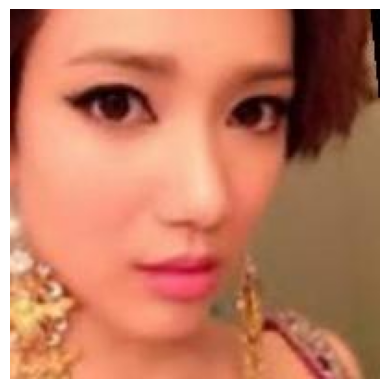

In [ ]:
from PIL import Image
img = Image.open(df['image'][10])
plt.axis('off')
plt.imshow(img);

<Axes: xlabel='age', ylabel='Density'>

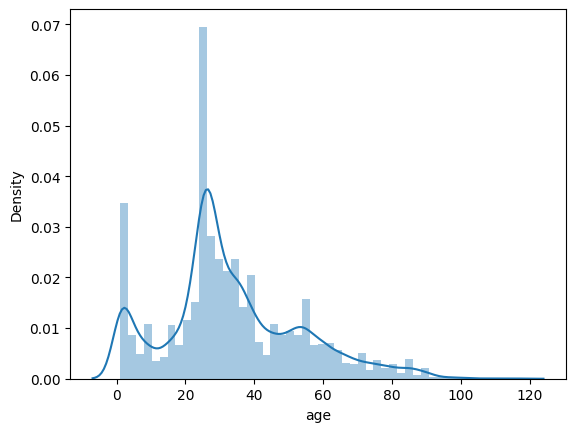

In [ ]:
sns.distplot(df['age'])

<Axes: xlabel='gender', ylabel='count'>

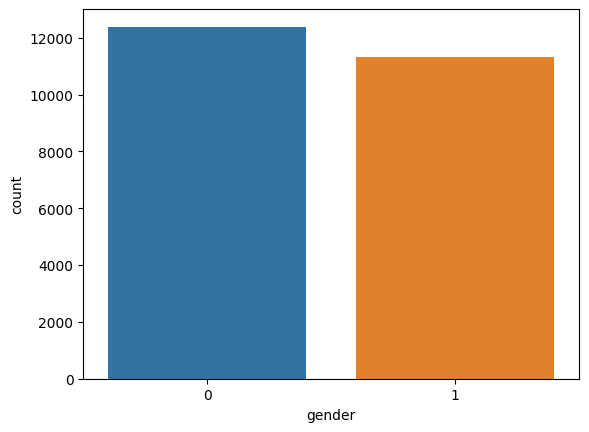

In [ ]:
sns.countplot(x="gender",data=df)

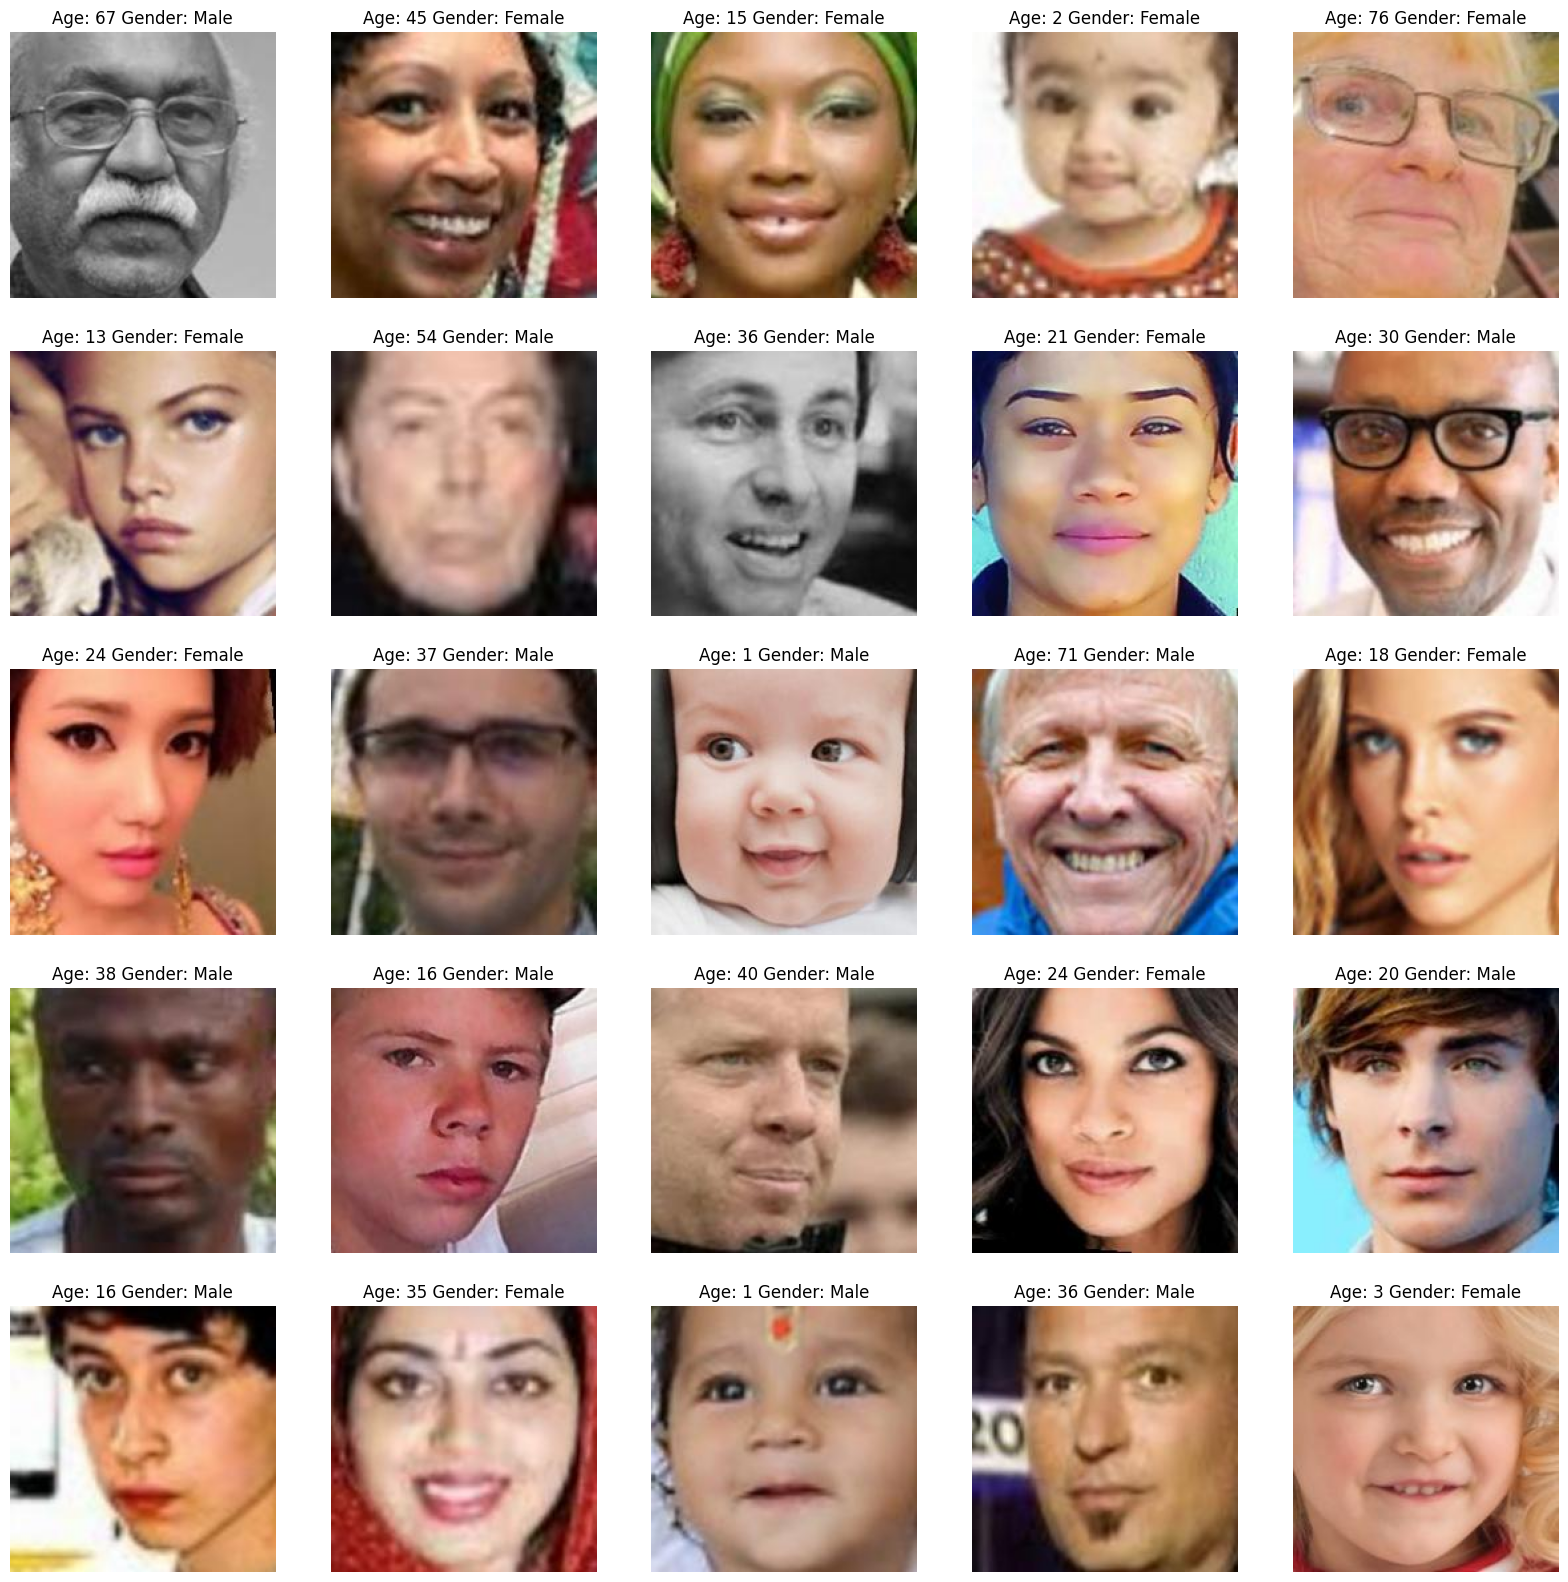

In [ ]:
# to display grid of images
plt.figure(figsize=(20, 20))
files = df.iloc[0:25]

for index, file, age, gender in files.itertuples():
    plt.subplot(5, 5, index+1)
    img = load_img(file)
    img = np.array(img)
    plt.imshow(img)
    plt.title(f"Age: {age} Gender: {gender_dict[gender]}")
    plt.axis('off')

In [ ]:
import os
import pandas as pd
from tqdm import tqdm  # Import tqdm as a module, not a function
import numpy as np
from sklearn.utils import shuffle

image_paths = []
age_labels = []
gender_labels = []

# Counters to keep track of the number of male and female images
male_count = 0
female_count = 0

# Maximum number of images to keep for each gender
max_images_per_gender = 11000

# Desired age group distribution
age_groups = [(0, 10), (11, 20), (21, 30), (31, 40), (41, 50), (51, 60), (61, 70), (71, 80), (81, 100)]
max_images_per_age_group = max_images_per_gender // len(age_groups)

for filename in tqdm(os.listdir(BASE_DIR)):
    image_path = os.path.join(BASE_DIR, filename)
    temp = filename.split('_')
    age = int(temp[0])
    gender = int(temp[1])

    # Check if the maximum number of images per gender has been reached
    if (gender == 0 and male_count < max_images_per_gender) or (gender == 1 and female_count < max_images_per_gender):
        # Check if the age group limit has been reached for this gender
        age_group = next((group for group in age_groups if group[0] <= age <= group[1]), None)
        if age_group is not None and age_labels.count(age_group) < max_images_per_age_group:
            image_paths.append(image_path)
            age_labels.append(age)
            gender_labels.append(gender)

            # Update the gender counters
            if gender == 0:
                male_count += 1
            else:
                female_count += 1

# Convert to a DataFrame
df = pd.DataFrame()
df['image'], df['age'], df['gender'] = image_paths, age_labels, gender_labels

# Shuffle the DataFrame
df = shuffle(df)

# Display the distribution of genders and age groups
print(df['gender'].value_counts())
print(df['age'].value_counts())

100%|██████████| 23708/23708 [00:06<00:00, 3798.29it/s]


1    11000
0    11000
Name: gender, dtype: int64
26    2068
1     1034
28     845
35     817
24     811
      ... 
95       9
99       8
87       8
93       5
91       2
Name: age, Length: 97, dtype: int64


<Axes: xlabel='gender', ylabel='count'>

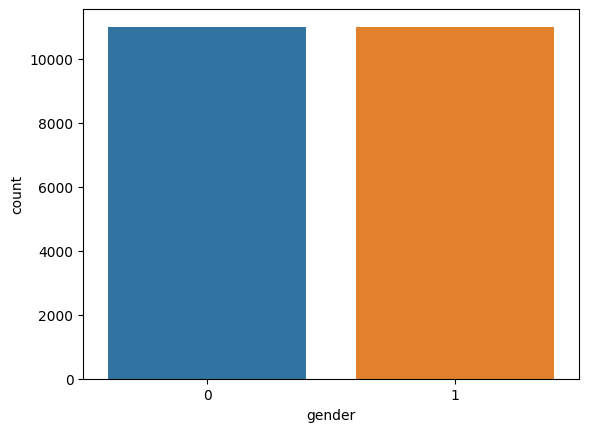

In [ ]:
sns.countplot(x="gender",data=df)

<Axes: xlabel='age', ylabel='Density'>

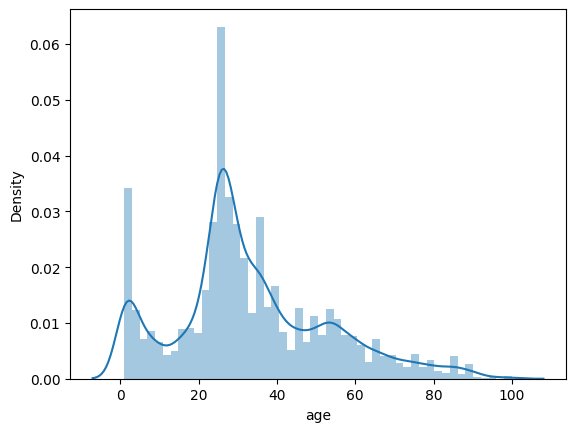

In [ ]:
sns.distplot(df['age'])

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

# Define your data augmentation parameters
datagen = ImageDataGenerator(
    rotation_range=20, # Rotate images by up to 20 degrees
    width_shift_range=0.2, # Shift images horizontally by up to 20% of the width
    height_shift_range=0.2, # Shift images vertically by up to 20% of the height
    shear_range=0.2, # Apply shear transformations
    zoom_range=0.2, # Zoom in by up to 20%
    horizontal_flip=True, # Flip images horizontally
    fill_mode='nearest', # Fill in newly created pixels
    rescale=1./255 # Normalize pixel values
)

# Create a generator for augmented data
augmented_train_data = datagen.flow_from_dataframe(
    dataframe=df,
    x_col='image',
    y_col=['age', 'gender'],
    target_size=(128, 128),
    batch_size=32,
    class_mode='multi_output', # For both age and gender predictions.
    shuffle=True
)

Found 22000 validated image filenames.


In [ ]:
#Feature Extraction

In [ ]:
import tqdm

def extract_features(images):
    features = []
    for image in tqdm.tqdm(images):
        img = load_img(image, grayscale=True)
        img = img.resize((128, 128), Image.ANTIALIAS)
        img = np.array(img)
        features.append(img)

    features = np.array(features)
    # ignore this step if using RGB
    features = features.reshape(len(features), 128, 128, 1)
    return features

X = extract_features(df['image'])

100%|██████████| 22000/22000 [00:26<00:00, 843.02it/s]


In [ ]:
X.shape

(22000, 128, 128, 1)

In [ ]:
# normalize the images
X = X/255.0

In [ ]:
y_gender = np.array(df['gender'])
y_age = np.array(df['age'])

In [ ]:
input_shape = (128, 128, 1)

In [ ]:
datagen.fit(X)

In [ ]:
#Model Creation

In [ ]:
inputs = Input((input_shape))
# convolutional layers
conv_1 = Conv2D(32, kernel_size=(3, 3), activation='relu') (inputs)
maxp_1 = MaxPooling2D(pool_size=(2, 2)) (conv_1)
conv_2 = Conv2D(64, kernel_size=(3, 3), activation='relu') (maxp_1)
maxp_2 = MaxPooling2D(pool_size=(2, 2)) (conv_2)
conv_3 = Conv2D(128, kernel_size=(3, 3), activation='relu') (maxp_2)
maxp_3 = MaxPooling2D(pool_size=(2, 2)) (conv_3)
conv_4 = Conv2D(256, kernel_size=(3, 3), activation='relu') (maxp_3)
maxp_4 = MaxPooling2D(pool_size=(2, 2)) (conv_4)

flatten = Flatten() (maxp_4)

# fully connected layers
dense_1 = Dense(256, activation='relu') (flatten)
dense_2 = Dense(256, activation='relu') (flatten)

dropout_1 = Dropout(0.3) (dense_1)
dropout_2 = Dropout(0.3) (dense_2)

output_1 = Dense(1, activation='sigmoid', name='gender_out') (dropout_1)
output_2 = Dense(1, activation='relu', name='age_out') (dropout_2)

model = Model(inputs=[inputs], outputs=[output_1, output_2])

model.compile(loss=['binary_crossentropy', 'mae'], optimizer='adam', metrics=['accuracy'])

In [ ]:
# train model
history = model.fit(x=X, y=[y_gender, y_age], batch_size=32, epochs=30, validation_split=0.2)

Epoch 1/30
550/550 [==============================] - 27s 24ms/step - loss: 16.3306 - gender_out_loss: 0.7044 - age_out_loss: 15.6262 - gender_out_accuracy: 0.5118 - age_out_accuracy: 0.0455 - val_loss: 14.8638 - val_gender_out_loss: 0.6540 - val_age_out_loss: 14.2098 - val_gender_out_accuracy: 0.6307 - val_age_out_accuracy: 0.0536
Epoch 2/30
550/550 [==============================] - 12s 22ms/step - loss: 12.6607 - gender_out_loss: 0.5489 - age_out_loss: 12.1119 - gender_out_accuracy: 0.7241 - age_out_accuracy: 0.0366 - val_loss: 10.5462 - val_gender_out_loss: 0.4700 - val_age_out_loss: 10.0762 - val_gender_out_accuracy: 0.7680 - val_age_out_accuracy: 0.0334
Epoch 3/30
550/550 [==============================] - 11s 20ms/step - loss: 10.3883 - gender_out_loss: 0.4368 - age_out_loss: 9.9516 - gender_out_accuracy: 0.7962 - age_out_accuracy: 0.0181 - val_loss: 9.2644 - val_gender_out_loss: 0.4047 - val_age_out_loss: 8.8598 - val_gender_out_accuracy: 0.8114 - val_age_out_accuracy: 0.0077
E

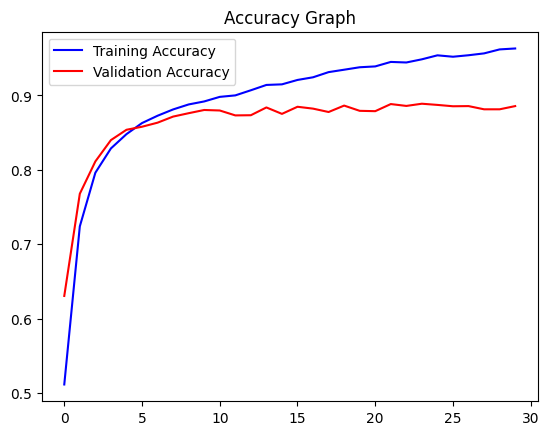

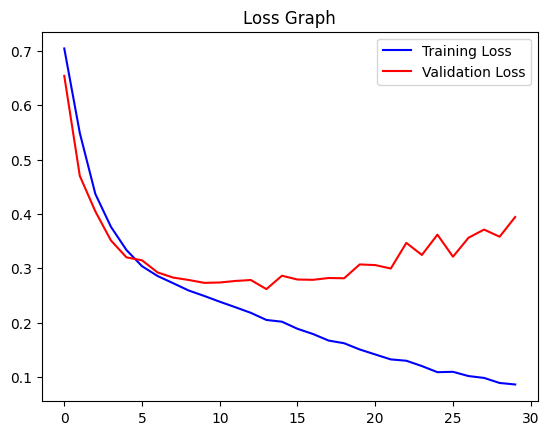

In [ ]:
# plot results for gender
acc = history.history['gender_out_accuracy']
val_acc = history.history['val_gender_out_accuracy']
epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Accuracy Graph')
plt.legend()
plt.figure()

loss = history.history['gender_out_loss']
val_loss = history.history['val_gender_out_loss']

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Loss Graph')
plt.legend()
plt.show()

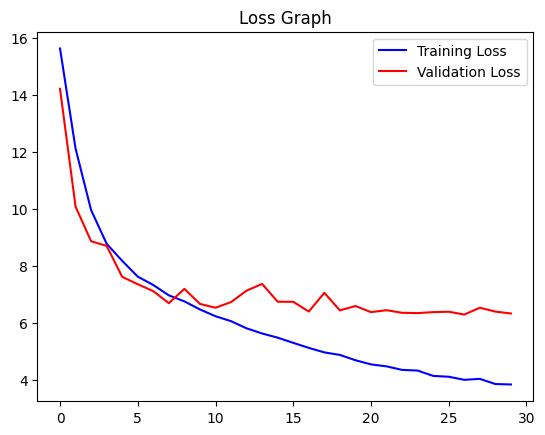

In [ ]:
# plot results for age
loss = history.history['age_out_loss']
val_loss = history.history['val_age_out_loss']
epochs = range(len(loss))

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Loss Graph')
plt.legend()
plt.show()

Original Gender: Male Original Age: 31
1/1 [==============================] - 0s 77ms/step
Predicted Gender: Male Predicted Age: 33


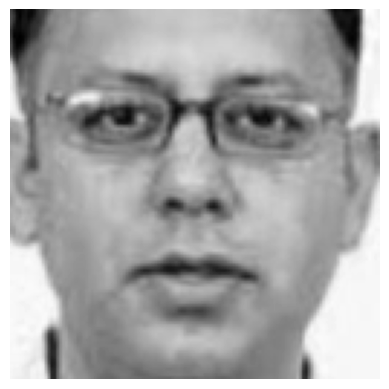

In [ ]:
#Prediction with Test Data
image_index = 55
print("Original Gender:", gender_dict[y_gender[image_index]], "Original Age:", y_age[image_index])
# predict from model
pred = model.predict(X[image_index].reshape(1, 128, 128, 1))
pred_gender = gender_dict[round(pred[0][0][0])]
pred_age = round(pred[1][0][0])
print("Predicted Gender:", pred_gender, "Predicted Age:", pred_age)
plt.axis('off')
plt.imshow(X[image_index].reshape(128, 128), cmap='gray');

In [ ]:
model.save("model_new.h5")

In [ ]:
import tensorflow as tf
from google.colab import drive

# Mount your Google Drive.
drive.mount('/content/drive')

# Save the model to Google Drive.
model.save('/content/drive/My Drive/model_new.h5')

Mounted at /content/drive


In [ ]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input
from tensorflow.keras.models import Model

# Input layer
input_shape = (128, 128, 1)
inputs = Input(shape=input_shape)

# Convolutional layers
conv_1 = Conv2D(64, kernel_size=(3, 3), activation='relu')(inputs)
maxp_1 = MaxPooling2D(pool_size=(2, 2))(conv_1)

conv_2 = Conv2D(128, kernel_size=(3, 3), activation='relu')(maxp_1)
maxp_2 = MaxPooling2D(pool_size=(2, 2))(conv_2)

conv_3 = Conv2D(256, kernel_size=(3, 3), activation='relu')(maxp_2)
maxp_3 = MaxPooling2D(pool_size=(2, 2))(conv_3)

conv_4 = Conv2D(512, kernel_size=(3, 3), activation='relu')(maxp_3)
maxp_4 = MaxPooling2D(pool_size=(2, 2))(conv_4)

# Flatten layer
flatten = Flatten()(maxp_4)

# Fully connected layers
dense_1 = Dense(1024, activation='relu')(flatten)
dropout_1 = Dropout(0.5)(dense_1)

dense_2 = Dense(512, activation='relu')(dropout_1)
dropout_2 = Dropout(0.5)(dense_2)

# Output layers
output_gender = Dense(1, activation='sigmoid', name='gender_out')(dropout_1)
output_age = Dense(1, activation='relu', name='age_out')(dropout_2)

# Create the model
model_cnn_new = Model(inputs=inputs, outputs=[output_gender, output_age])

# Compile the model
model_cnn_new.compile(loss=['binary_crossentropy', 'mae'], optimizer='adam', metrics=['accuracy'])


In [ ]:
# train model
history = model_cnn_new.fit(x=X, y=[y_gender, y_age], batch_size=32, epochs=30, validation_split=0.2)

Epoch 1/30
550/550 [==============================] - 28s 43ms/step - loss: 16.7282 - gender_out_loss: 0.7518 - age_out_loss: 15.9764 - gender_out_accuracy: 0.4975 - age_out_accuracy: 0.0455 - val_loss: 15.5509 - val_gender_out_loss: 0.6932 - val_age_out_loss: 14.8577 - val_gender_out_accuracy: 0.5016 - val_age_out_accuracy: 0.0536
Epoch 2/30
550/550 [==============================] - 23s 42ms/step - loss: 16.0912 - gender_out_loss: 0.6999 - age_out_loss: 15.3914 - gender_out_accuracy: 0.4974 - age_out_accuracy: 0.0456 - val_loss: 15.5536 - val_gender_out_loss: 0.6933 - val_age_out_loss: 14.8603 - val_gender_out_accuracy: 0.4984 - val_age_out_accuracy: 0.0536
Epoch 3/30
550/550 [==============================] - 23s 42ms/step - loss: 16.0025 - gender_out_loss: 0.6966 - age_out_loss: 15.3059 - gender_out_accuracy: 0.4962 - age_out_accuracy: 0.0456 - val_loss: 15.5543 - val_gender_out_loss: 0.6936 - val_age_out_loss: 14.8606 - val_gender_out_accuracy: 0.5016 - val_age_out_accuracy: 0.053

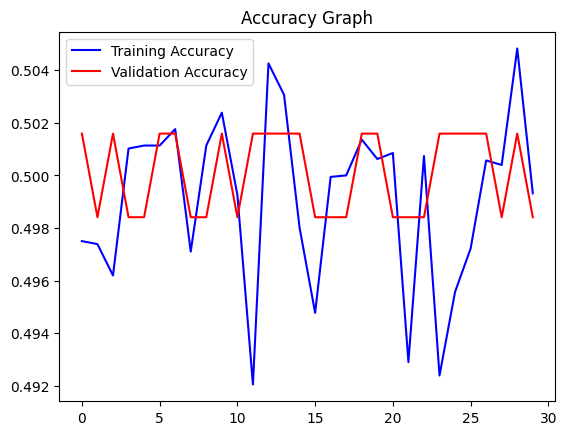

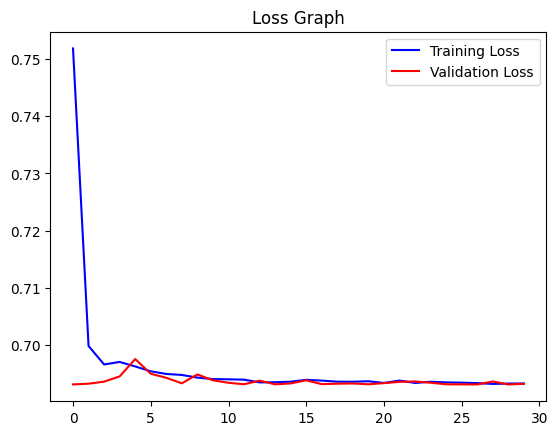

In [ ]:
# plot results for gender
acc = history.history['gender_out_accuracy']
val_acc = history.history['val_gender_out_accuracy']
epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Accuracy Graph')
plt.legend()
plt.figure()

loss = history.history['gender_out_loss']
val_loss = history.history['val_gender_out_loss']

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Loss Graph')
plt.legend()
plt.show()

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

# Load the saved model from Google Drive.
model = tf.keras.models.load_model('/content/drive/My Drive/model_cnn.h5')

# Define a function to make predictions on an uploaded image.
def predict_uploaded_image(image_path):
    # Load and preprocess the uploaded image.
    img = image.load_img(image_path, target_size=(128, 128), color_mode="grayscale")
    img_array = image.img_to_array(img)
    img_array = img_array / 255.0  # Normalize the image.
    img_array = np.expand_dims(img_array, axis=0)  # Add a batch dimension.

    # Make predictions.
    predictions = model.predict(img_array)
    gender_prediction, age_prediction = predictions

    # Post-process the predictions.
    gender_label = "Male" if gender_prediction[0][0] > 0.5 else "Female"
    age_label = int(round(age_prediction[0][0]))

    return gender_label, age_label

# Upload an image for prediction.
uploaded_image_path = "/content/OIP (6).jpeg"  # Replace with the path to your uploaded image.
gender, age = predict_uploaded_image(uploaded_image_path)

# Display the prediction results.
print("Predicted Gender:", gender)
print("Predicted Age:", age)

# Display the uploaded image.
img = image.load_img(uploaded_image_path)
plt.imshow(img)
plt.axis('off')
plt.show()


Found 17600 validated image filenames.
Found 4400 validated image filenames.
94765736/94765736 [==============================] - 1s 0us/step
Epoch 1/3
550/550 [==============================] - 172s 214ms/step - loss: 0.6353 - age_loss: 0.2345 - gender_loss: 0.4008 - age_mae: 0.2345 - gender_accuracy: 0.8211 - val_loss: 1.5439 - val_age_loss: 0.2350 - val_gender_loss: 1.3089 - val_age_mae: 0.2350 - val_gender_accuracy: 0.4909
Epoch 2/3
550/550 [==============================] - 115s 210ms/step - loss: 0.3781 - age_loss: 0.1185 - gender_loss: 0.2597 - age_mae: 0.1185 - gender_accuracy: 0.8953 - val_loss: 0.3477 - val_age_loss: 0.0883 - val_gender_loss: 0.2594 - val_age_mae: 0.0883 - val_gender_accuracy: 0.8848
Epoch 3/3
550/550 [==============================] - 115s 210ms/step - loss: 0.3291 - age_loss: 0.1047 - gender_loss: 0.2244 - age_mae: 0.1047 - gender_accuracy: 0.9103 - val_loss: 0.2903 - val_age_loss: 0.0802 - val_gender_loss: 0.2101 - val_age_mae: 0.0802 - val_gender_accuracy

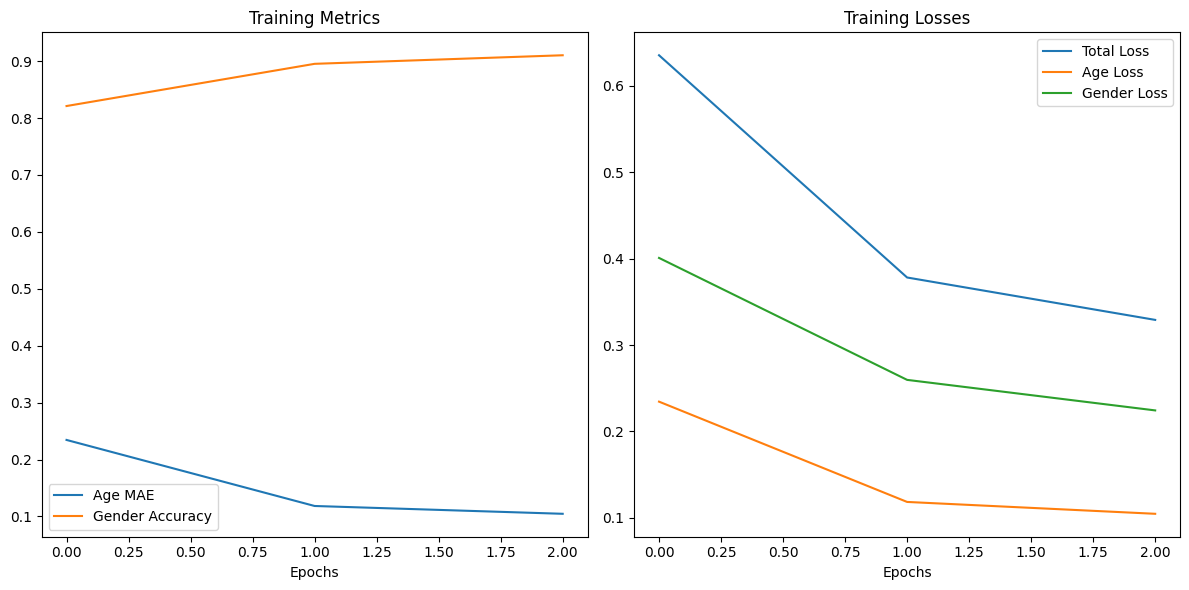

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Conv2D, Flatten, Dense, Lambda, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import matplotlib.pyplot as plt

# Load your DataFrame 'df' containing image paths, age, and gender information

# Scale age values to [0, 1]
scaler = MinMaxScaler()
df['age'] = scaler.fit_transform(df['age'].values.reshape(-1, 1))

# Split your DataFrame into training and validation DataFrames
train_df, val_df = train_test_split(df, test_size=0.2, random_state=42)

# Create separate data generators for training and validation
train_datagen = ImageDataGenerator(
    rotation_range=10,  # Reduced rotation range
    width_shift_range=0.1,  # Reduced width shift range
    height_shift_range=0.1,  # Reduced height shift range
    shear_range=0.1,  # Reduced shear range
    zoom_range=0.1,  # Reduced zoom range
    horizontal_flip=True,
    fill_mode='nearest',
    rescale=1./255
)

val_datagen = ImageDataGenerator(
    rescale=1./255  # Only rescale for validation data
)

# Create data generators for training and validation
train_generator = train_datagen.flow_from_dataframe(
    dataframe=train_df,
    x_col='image',
    y_col=['age', 'gender'],
    target_size=(128, 128),
    batch_size=32,
    class_mode='multi_output',
    shuffle=True
)

val_generator = val_datagen.flow_from_dataframe(
    dataframe=val_df,
    x_col='image',
    y_col=['age', 'gender'],
    target_size=(128, 128),
    batch_size=32,
    class_mode='multi_output',
    shuffle=False  # No need to shuffle validation data
)

# Load the ResNet50 model with pre-trained weights (excluding the top classification layer)
resnet50 = ResNet50(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

# Add additional layers for your multi-output task
x = GlobalAveragePooling2D()(resnet50.output)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)

# Separate branches for age and gender predictions
age_output = Dense(1, activation='linear', name='age')(x)  # Linear activation for age prediction
gender_output = Dense(1, activation='sigmoid', name='gender')(x)  # Sigmoid activation for gender prediction

# Create a model with multiple outputs
model_resnet50 = Model(inputs=resnet50.input, outputs=[age_output, gender_output])

# Compile the model with appropriate loss functions and metrics for each output
model_resnet50.compile(optimizer=Adam(learning_rate=1e-4),
                     loss={'age': 'mean_absolute_error', 'gender': 'binary_crossentropy'},
                     metrics={'age': 'mae', 'gender': 'accuracy'})

# Train the model on the augmented training data and validate on the validation data
hist = model_resnet50.fit(
    train_generator,
    steps_per_epoch=len(train_df) // 32,
    validation_data=val_generator,
    validation_steps=len(val_df) // 32,
    epochs=3
)

# Plot accuracy and loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(hist.history['age_mae'], label='Age MAE')
plt.plot(hist.history['gender_accuracy'], label='Gender Accuracy')
plt.title('Training Metrics')
plt.xlabel('Epochs')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(hist.history['loss'], label='Total Loss')
plt.plot(hist.history['age_loss'], label='Age Loss')
plt.plot(hist.history['gender_loss'], label='Gender Loss')
plt.title('Training Losses')
plt.xlabel('Epochs')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
#save the model
model_resnet50.save("model_resnet50_3.h5")

In [ ]:
import tensorflow as tf
from google.colab import drive

# Mount your Google Drive.
drive.mount('/content/drive')

# Save the model to Google Drive.
model_dense.save('/content/drive/My Drive/model_resnet50_2.h5')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


NameError: ignored

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

# Load the saved model from Google Drive.
model = tf.keras.models.load_model("/content/model_resnet50_1.h5")

# Define a function to make predictions on an uploaded image.
def predict_uploaded_image(image_path):
    # Load and preprocess the uploaded image.
    img = image.load_img(image_path, target_size=(128, 128), color_mode="grayscale")
    img_array = image.img_to_array(img)
    img_array = img_array / 255.0  # Normalize the image.
    img_array = np.expand_dims(img_array, axis=0)  # Add a batch dimension.

    # Make predictions.
    predictions = model.predict(img_array)
    gender_prediction, age_prediction = predictions

    # Post-process the predictions.
    gender_label = "Male" if gender_prediction[0][0] > 0.5 else "Female"
    age_label = int(round(age_prediction[0][0]))

    return gender_label, age_label

# Upload an image for prediction.
uploaded_image_path = "/content/OIP (6).jpeg"  # Replace with the path to your uploaded image.
gender, age = predict_uploaded_image(uploaded_image_path)

# Display the prediction results.
print("Predicted Gender:", gender)
print("Predicted Age:", age)

# Display the uploaded image.
img = image.load_img(uploaded_image_path)
plt.imshow(img)
plt.axis('off')
plt.show()


OSError: ignored

In [ ]:
#Predictin with test data
image_index = 100
print("Original Gender:", gender_dict[y_gender[image_index]], "Original Age:", y_age[image_index])
# predict from model
pred = model_resnet50.predict(X[image_index].reshape(1, 128, 128, 1))
pred_gender = gender_dict[round(pred[0][0][0])]
pred_age = round(pred[1][0][0])
print("Predicted Gender:", pred_gender, "Predicted Age:", pred_age)
plt.axis('off')
plt.imshow(X[image_index].reshape(128, 128), cmap='gray');

Original Gender: Female Original Age: 4


ValueError: ignored

1/1 [==============================] - 3s 3s/step


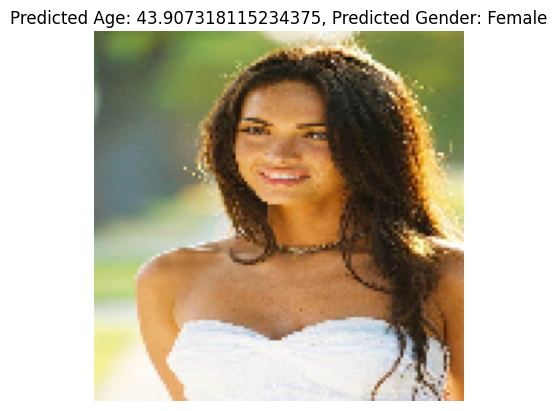

In [ ]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
import numpy as np

# Load and preprocess the new image
image_path = '/content/OIP (6).jpeg'  # Replace with the path to your image
img = image.load_img(image_path, target_size=(128, 128))
img = image.img_to_array(img)
img = np.expand_dims(img, axis=0)
img = img / 255.0  # Normalize the image to [0, 1]

# Make predictions
predictions = model_resnet50.predict(img)

# Extract age and gender predictions
age_prediction = scaler.inverse_transform(predictions[0])[0][0]  # Inverse transform age prediction
gender_prediction = 'Female' if predictions[1][0][0] >= 0.5 else 'Male'

# Display the image
plt.imshow(img[0])
plt.axis('off')
plt.title(f"Predicted Age: {age_prediction}, Predicted Gender: {gender_prediction}")
plt.show()


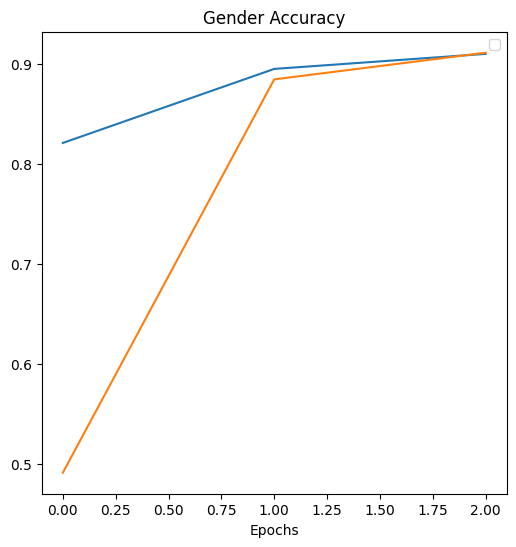

In [ ]:

# Plot accuracy only
plt.figure(figsize=(6, 6))  # Adjust the figure size as needed
plt.plot(hist.history['gender_accuracy'])
plt.plot(hist.history['val_gender_accuracy'])
plt.title('Gender Accuracy')
plt.xlabel('Epochs')
plt.legend()
plt.show()
